In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy.fft import fft 
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats.stats import pearsonr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy
import cartopy.feature as cfeat
import numpy.ma as ma
import time
import pandas as pd
from netCDF4 import Dataset
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#statistics
from scipy import signal,stats
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_11571/4163732201.py:9: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [3]:
import xarray as xr
import pandas as pd
from matplotlib.pyplot import plot, savefig
import matplotlib.colors
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
parameters = {'xtick.labelsize':14,
              'ytick.labelsize':14,
              'axes.labelsize':14,
              'axes.linewidth':2}
plt.rcParams.update(parameters)

In [5]:
import netCDF4
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import multiprocessing
import os

In [6]:
fname = '/home/wester/Desktop/SST/index_10_60d_rainfall_weekly_JJAS_1982-2019.nc'
ds = xr.open_dataset(fname)
lon1 = ds['longitude']
lat1 = ds['latitude']
time1 = ds['time'].data
Rainf = ds['__xarray_dataarray_variable__']
Rain = ds['__xarray_dataarray_variable__'].data

In [7]:
# Supposons que Rain est un DataArray avec (time, lat1, lon1)
Rain_index = Rainf.mean(dim=["latitude", "longitude"], skipna=True)

In [8]:
# Fonction pour transformer SST en 2D (time, space)
def reshape_data(da):
    return da.stack(space=("latitude", "longitude")).fillna(0)  # NaN remplacés par 0

In [9]:
index_10_60d=reshape_data(Rainf)
index_10_60d

<xarray.DataArray '__xarray_dataarray_variable__' (time: 662, space: 14000)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time       (time) datetime64[ns] 1982-06-07 1982-06-14 ... 2019-09-30
  * space      (space) object MultiIndex
  * latitude   (space) float32 12.02 12.02 12.02 12.02 ... 16.97 16.97 16.97
  * longitude  (space) float32 -17.98 -17.93 -17.88 ... -11.12 -11.07 -11.03

Dans cette partie, nous avons extrait les times correspondant à chaque délai de prévision. Ceci nous permettra d'avoir le format time (yyyy-mm-dd).

In [10]:
time_lag0 = time1
week1 = xr.open_dataset('/home/wester/Desktop/SST/sst_7days.nc')
time_lag7 = week1['time'].data
week2 = xr.open_dataset('/home/wester/Desktop/SST/sst_14days.nc')
time_lag14 = week2['time'].data
week3 = xr.open_dataset('/home/wester/Desktop/SST/sst_21days.nc')
time_lag21 = week3['time'].data
week4 = xr.open_dataset('/home/wester/Desktop/SST/sst_28days.nc')
time_lag28 = week4['time'].data
week5 = xr.open_dataset('/home/wester/Desktop/SST/sst_35days.nc')
time_lag35 = week5['time'].data

In [11]:
SST_0d=np.load('/home/wester/Desktop/SST/preduct_0d_weekly_sst.npy')
SST_7d=np.load('/home/wester/Desktop/SST/preduct_7d_weekly_sst.npy')
SST_14d=np.load('/home/wester/Desktop/SST/preduct_14d_weekly_sst.npy')
SST_21d=np.load('/home/wester/Desktop/SST/preduct_21d_weekly_sst.npy')
SST_28d=np.load('/home/wester/Desktop/SST/preduct_28d_weekly_sst.npy')
SST_35d=np.load('/home/wester/Desktop/SST/preduct_35d_weekly_sst.npy')

In [12]:
OLR_0d=np.load('/home/wester/Desktop/SST/OLR/preduct_0d_weekly_olr.npy')
OLR_7d=np.load('/home/wester/Desktop/SST/OLR/preduct_7d_weekly_olr.npy')
OLR_14d=np.load('/home/wester/Desktop/SST/OLR/preduct_14d_weekly_olr.npy')
OLR_21d=np.load('/home/wester/Desktop/SST/OLR/preduct_21d_weekly_olr.npy')
OLR_28d=np.load('/home/wester/Desktop/SST/OLR/preduct_28d_weekly_olr.npy')
OLR_35d=np.load('/home/wester/Desktop/SST/OLR/preduct_35d_weekly_olr.npy')

In [13]:
U200_0d=np.load('/home/wester/Desktop/SST/wind/preduct_0d_weekly_u200.npy')
U200_7d=np.load('/home/wester/Desktop/SST/wind/preduct_7d_weekly_u200.npy')
U200_14d=np.load('/home/wester/Desktop/SST/wind/preduct_14d_weekly_u200.npy')
U200_21d=np.load('/home/wester/Desktop/SST/wind/preduct_21d_weekly_u200.npy')
U200_28d=np.load('/home/wester/Desktop/SST/wind/preduct_28d_weekly_u200.npy')
U200_35d=np.load('/home/wester/Desktop/SST/wind/preduct_35d_weekly_u200.npy')

In [14]:
U850_0d=np.load('/home/wester/Desktop/SST/wind/preduct_0d_weekly_u850.npy')
U850_7d=np.load('/home/wester/Desktop/SST/wind/preduct_7d_weekly_u850.npy')
U850_14d=np.load('/home/wester/Desktop/SST/wind/preduct_14d_weekly_u850.npy')
U850_21d=np.load('/home/wester/Desktop/SST/wind/preduct_21d_weekly_u850.npy')
U850_28d=np.load('/home/wester/Desktop/SST/wind/preduct_28d_weekly_u850.npy')
U850_35d=np.load('/home/wester/Desktop/SST/wind/preduct_35d_weekly_u850.npy')

In [15]:
H200_0d=np.load('/home/wester/Desktop/SST/ERA5/preduct_0d_weekly_gp200.npy')
H200_7d=np.load('/home/wester/Desktop/SST/ERA5/preduct_7d_weekly_gp200.npy')
H200_14d=np.load('/home/wester/Desktop/SST/ERA5/preduct_14d_weekly_gp200.npy')
H200_21d=np.load('/home/wester/Desktop/SST/ERA5/preduct_21d_weekly_gp200.npy')
H200_28d=np.load('/home/wester/Desktop/SST/ERA5/preduct_28d_weekly_gp200.npy')
H200_35d=np.load('/home/wester/Desktop/SST/ERA5/preduct_35d_weekly_gp200.npy')

In [16]:
H500_0d=np.load('/home/wester/Desktop/SST/ERA5/preduct_0d_weekly_gp500.npy')
H500_7d=np.load('/home/wester/Desktop/SST/ERA5/preduct_7d_weekly_gp500.npy')
H500_14d=np.load('/home/wester/Desktop/SST/ERA5/preduct_14d_weekly_gp500.npy')
H500_21d=np.load('/home/wester/Desktop/SST/ERA5/preduct_21d_weekly_gp500.npy')
H500_28d=np.load('/home/wester/Desktop/SST/ERA5/preduct_28d_weekly_gp500.npy')
H500_35d=np.load('/home/wester/Desktop/SST/ERA5/preduct_35d_weekly_gp500.npy')

In [17]:
H850_0d=np.load('/home/wester/Desktop/SST/ERA5/preduct_0d_weekly_gp850.npy')
H850_7d=np.load('/home/wester/Desktop/SST/ERA5/preduct_7d_weekly_gp850.npy')
H850_14d=np.load('/home/wester/Desktop/SST/ERA5/preduct_14d_weekly_gp850.npy')
H850_21d=np.load('/home/wester/Desktop/SST/ERA5/preduct_21d_weekly_gp850.npy')
H850_28d=np.load('/home/wester/Desktop/SST/ERA5/preduct_28d_weekly_gp850.npy')
H850_35d=np.load('/home/wester/Desktop/SST/ERA5/preduct_35d_weekly_gp850.npy')

In [18]:
H850_35d.shape

(662,)

In [19]:
delai_0d=[OLR_0d,U200_0d,U850_0d,H200_0d,H500_0d,H850_0d,SST_0d]
delai_7d=[OLR_7d,U200_7d,U850_7d,H200_7d,H500_7d,H850_7d,SST_7d]
delai_14d=[OLR_14d,U200_14d,U850_14d,H200_14d,H500_14d,H850_14d,SST_14d]
delai_21d=[OLR_21d,U200_21d,U850_21d,H200_21d,H500_21d,H850_21d,SST_21d]
delai_28d=[OLR_28d,U200_28d,U850_28d,H200_28d,H500_28d,H850_28d,SST_28d]
delai_35d=[OLR_35d,U200_35d,U850_35d,H200_35d,H500_35d,H850_35d, SST_35d]

In [20]:
delai_0dy= np.array(delai_0d)
delai_7dy= np.array(delai_7d)
delai_14dy= np.array(delai_14d)
delai_21dy= np.array(delai_21d)
delai_28dy= np.array(delai_28d)
delai_35dy= np.array(delai_35d)

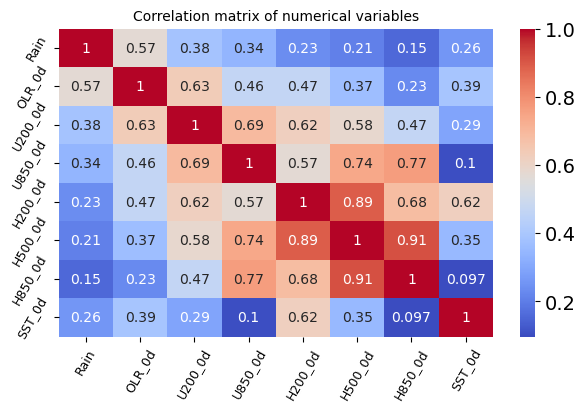

In [21]:
import seaborn as sns
# Corrélation entre les variables numériques
fig,ax=plt.subplots(figsize = (7,4))
Rain=Rain_index
donnes=[Rain,OLR_0d,U200_0d,U850_0d,H200_0d,H500_0d,H850_0d,SST_0d]
donnes=np.array(donnes)
# Calculer la matrice de corrélation
corr_matrix = np.corrcoef(donnes.T, rowvar=False)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical variables',fontsize=10)
delai=['Rain','OLR_0d','U200_0d','U850_0d','H200_0d','H500_0d','H850_0d','SST_0d']
ax.set_xticklabels(delai,fontsize=9,rotation=60)
ax.set_yticklabels(delai,fontsize=9,rotation=60)
plt.savefig('/home/wester/Desktop/MonDossier/Figures/matrice_correlation_1982-2019.pdf', bbox_inches='tight')
plt.show()

In [22]:
aa0=np.transpose(delai_0dy)
aa7=np.transpose(delai_7dy)
aa14=np.transpose(delai_14dy)
aa21=np.transpose(delai_21dy)
aa28=np.transpose(delai_28dy)
aa35=np.transpose(delai_35dy)

In [23]:
Index_rain_SNG=Rain_index.data

In [24]:
Index_rain_SNG.shape

(662,)

In [25]:
aa28.shape

(662, 7)

**Dans cette étude**, les signaux ISO des champs atmosphériques et de l'anomalie de précipitaton sont normalisés en utilisant la méthode de **(Yeo et Johnson, 2000)**.Pour la quantité de précipitation hébdomadaire, nous avons utilisé la **méthode de transformation log-sinh** proposée par **Wang et al. (2012)**, pour la normaliser.

In [26]:
from sklearn.preprocessing import PowerTransformer
# Initialiser un objet PowerTransformer avec la méthode de Yeo-Johnson
yeo_johnson = PowerTransformer(method='yeo-johnson')

In [27]:
delai_0days= yeo_johnson.fit_transform(aa0)
delai_7days= yeo_johnson.fit_transform(aa7)
delai_14days= yeo_johnson.fit_transform(aa14)
delai_21days= yeo_johnson.fit_transform(aa21)
delai_28days= yeo_johnson.fit_transform(aa28)
delai_35days= yeo_johnson.fit_transform(aa35)

In [28]:
delai_0days.shape

(662, 7)

In [29]:
Rain_Index=yeo_johnson.fit_transform(index_10_60d.data)

In [30]:
rain_Index=np.squeeze(yeo_johnson.fit_transform(np.reshape(Index_rain_SNG,[662,1])))

In [31]:
Rain_Index.shape , rain_Index.shape

((662, 14000), (662,))

In [32]:
var_0d = ['OLR_0d', 'U200_0d', 'U850_0d', 'H200_0d', 'H500_0d', 'H850_0d','SST_0d']
var_7d = ['OLR_7d', 'U200_7d', 'U850_7d', 'H200_7d', 'H500_7d', 'H850_7d','SST_7d']
var_14d = ['OLR_14d', 'U200_14d', 'U850_14d', 'H200_14d', 'H500_14d', 'H850_14d','SST_14d']
var_21d = ['OLR_21d', 'U200_21d', 'U850_21d', 'H200_21d', 'H500_21d', 'H850_21d','SST_21d']
var_28d = ['OLR_28d', 'U200_28d', 'U850_28d', 'H200_28d', 'H500_28d', 'H850_28d','SST_28d']
var_35d = ['OLR_35d', 'U200_35d', 'U850_35d', 'H200_35d', 'H500_35d', 'H850_35d','SST_35d']

In [33]:
# Reconstruire l'objet xarray à partir du résultat transformé
Rain_Index = xr.DataArray(Rain_Index, coords=index_10_60d.coords, dims=index_10_60d.dims)
rain_Index = xr.DataArray(rain_Index, coords={'time': time_lag0}, dims=['time'])
delai_0days = xr.DataArray(delai_0days, coords={'time': time_lag0, 'var': var_0d}, dims=['time','var'])
delai_7days = xr.DataArray(delai_7days, coords={'time': time_lag7, 'var': var_7d}, dims=['time','var'])
delai_14days = xr.DataArray(delai_14days, coords={'time': time_lag14, 'var': var_14d}, dims=['time','var'])
delai_21days = xr.DataArray(delai_21days, coords={'time': time_lag21, 'var': var_21d}, dims=['time','var'])
delai_28days = xr.DataArray(delai_28days, coords={'time': time_lag28, 'var': var_28d}, dims=['time','var'])
delai_35days = xr.DataArray(delai_35days, coords={'time': time_lag35, 'var': var_35d}, dims=['time','var'])

In [34]:
delai_0days

<xarray.DataArray (time: 662, var: 7)>
array([[-0.02475266,  0.96026303,  0.03012158, ...,  0.83015063,
         0.13501504,  0.65499279],
       [-0.90722535, -0.36399829, -1.2634782 , ...,  1.11097594,
         0.87784021,  0.73244765],
       [-1.05174406, -0.34626191,  0.63953243, ...,  0.91995322,
         0.81009322,  0.63371336],
       ...,
       [ 0.15850409,  0.8158452 ,  0.97620716, ...,  0.38841633,
         0.58572713, -1.70434656],
       [-0.51920592, -1.211057  , -1.41133405, ..., -1.42790807,
        -1.18262052, -1.77373598],
       [-0.34481296,  0.03202499,  0.60390424, ..., -0.25234736,
         0.30313969, -1.77306977]])
Coordinates:
  * time     (time) datetime64[ns] 1982-06-07 1982-06-14 ... 2019-09-30
  * var      (var) <U7 'OLR_0d' 'U200_0d' 'U850_0d' ... 'H850_0d' 'SST_0d'

In [35]:
# Fonction pour calculer le coefficient de corrélation avec gestion des NaN
def correlation_coefficient(y_true, y_pred):
    if np.var(y_true) == 0 or np.var(y_pred) == 0:
        return 0  # Si la variance est nulle, la corrélation est 0
    else:
        return pearsonr(y_true, y_pred)[0]

In [36]:
from sklearn.metrics import make_scorer,mean_absolute_error, mean_squared_error
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# Définition des scores à utiliser pour la validation croisée
scoring_mae = make_scorer(mean_absolute_error)
scoring_corr = make_scorer(correlation_coefficient)
n_jobs = -1

## Random Forest Model ##

In [37]:
# Boucle sur chaque délai pour effectuer la recherche de grille et obtenir les scores
delais = [delai_0days, delai_7days, delai_14days, delai_21days, delai_28days, delai_35days]
delai_names = ['0days', '7days', '14days', '21days', '28days', '35days']

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

def perform_grid_search(X_train, y_train, param_grid):
    """Effectue une recherche de grille et retourne le meilleur modèle."""
    reg_rf = RandomForestRegressor()
    grid_search = GridSearchCV(reg_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring=make_scorer(mean_absolute_error))
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    """Calcule les scores d'évaluation du modèle."""
    y_pred = model.predict(X_test)
    score_mae = mean_absolute_error(y_test, y_pred)
    score_corr = np.corrcoef(y_test, y_pred)[0, 1]
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return score_mae, score_corr, rmse, y_pred


In [39]:
def process_delay(delai, rain_Index, years_in_data, param_grid):
    """Applique la validation LOYO pour un délai donné et retourne les scores."""
    logo = LeaveOneGroupOut()
    year_scores_mae, year_scores_corr, year_scores_rmse, predictions_for_delay= [], [], [], []
    
    for train_idx, test_idx in logo.split(delai, groups=years_in_data):
        X_train, X_test = delai[train_idx].values, delai[test_idx].values
        y_train, y_test = rain_Index[train_idx].values, rain_Index[test_idx].values
        
        if X_train.ndim == 1:
            X_train = X_train.reshape(-1, 1)
        if X_test.ndim == 1:
            X_test = X_test.reshape(-1, 1)
        
        best_model = perform_grid_search(X_train, y_train, param_grid)
        score_mae, score_corr, rmse, y_pred = evaluate_model(best_model, X_test, y_test)
        
        year_scores_mae.append(score_mae)
        year_scores_corr.append(score_corr)
        year_scores_rmse.append(rmse)
        predictions_for_delay.append(y_pred)
    
    return year_scores_mae, year_scores_corr, year_scores_rmse, predictions_for_delay

In [40]:
def main(delais, delai_names, rain_Index):
    """Orchestre le processus pour tous les délais et affiche les résultats."""
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    years_in_data = rain_Index.coords['time'].dt.year.values
    if len(years_in_data) != len(rain_Index):
        raise ValueError("Les longueurs de 'time' et des années sont incohérentes.")
    
    model_scores_mae, model_scores_corr, model_scores_rmse, predictions_by_delay = [], [], [], []
    
    for delai, name in zip(delais, delai_names):
        mae, corr, rmse, predictions = process_delay(delai, rain_Index, years_in_data, param_grid)
        model_scores_mae.append(mae)
        model_scores_corr.append(corr)
        model_scores_rmse.append(rmse)
        predictions_by_delay.append(predictions)
        
        print(f"Délai {name}:")
        print(f"  MAE moyen: {np.mean(mae)}")
        print(f"  Corrélation moyenne: {np.mean(corr)}")
        print(f"  RMSE moyen: {np.mean(rmse)}")
    
    return model_scores_mae, model_scores_corr, model_scores_rmse, predictions_by_delay

In [41]:
# Exécution du script
model_scores_mae, model_scores_corr, model_scores_rmse, predictions_by_delay = main(delais, delai_names, rain_Index)

Délai 0days:
  MAE moyen: 0.6543938152721026
  Corrélation moyenne: 0.5697842362759951
  RMSE moyen: 0.8126909857816841
Délai 7days:
  MAE moyen: 0.6486531436650198
  Corrélation moyenne: 0.5441470480778324
  RMSE moyen: 0.8255002519038694
Délai 14days:
  MAE moyen: 0.6762430352599944
  Corrélation moyenne: 0.47986849913336566
  RMSE moyen: 0.8593475327973369
Délai 21days:
  MAE moyen: 0.7085761827162447
  Corrélation moyenne: 0.4183076342601984
  RMSE moyen: 0.8940663030335578
Délai 28days:
  MAE moyen: 0.7046496110865738
  Corrélation moyenne: 0.42793809822994716
  RMSE moyen: 0.8999960424052877
Délai 35days:
  MAE moyen: 0.7036488804174296
  Corrélation moyenne: 0.44619133465479044
  RMSE moyen: 0.8870310759570156


In [42]:
import zarr
years = np.arange(1982, 2020)  # 2020 non inclus, donc jusqu'à 2019
# Conversion des résultats en xarray
model_scores_mae_xr = xr.DataArray(model_scores_mae, coords={'delai': delai_names, 'year': years}, dims=['delai', 'year'])
model_scores_corr_xr = xr.DataArray(model_scores_corr, coords={'delai': delai_names, 'year': years}, dims=['delai', 'year'])
model_scores_rmse_xr = xr.DataArray(model_scores_rmse, coords={'delai': delai_names, 'year': years}, dims=['delai', 'year'])

# Sauvegarde des résultats en format Zarr
zarr_file_path = '/home/wester/Desktop/MonDossier/LOYO/data/Results_RF_Validation_LOYO_1982-2019.zarr'
# Création d'un Dataset xarray
ds = xr.Dataset({'scores_mae': model_scores_mae_xr,'scores_corr': model_scores_corr_xr,'scores_rmse': model_scores_rmse_xr})
# Sauvegarde au format Zarr
ds.to_zarr(zarr_file_path, mode='w')

# To see the spatial variability of scores

In [43]:
def safe_pearsonr(x, y):
    """
    Calcule le coefficient de corrélation de Pearson en évitant les avertissements
    si l'un des tableaux est constant.
    """
    if np.all(x == x[0]) or np.all(y == y[0]):
        return np.nan, np.nan  # ou une valeur par défaut
    else:
        return pearsonr(x, y)

In [44]:
from random_forest_modele import prepare_data, get_best_random_forest, random_forest_evaluate, run_random_forest
#from save_load_model import save_model, load_model

In [ ]:
# Puis, vous pouvez appeler la fonction principale comme suit :
model_scores_mae, model_scores_corr, model_scores_rmse, predictions_by_delay = run_random_forest(delais, delai_names, rain_Index, Rain_Index)

In [ ]:
# Définition des coordonnées
lonlat = np.arange(len(lat1)*len(lon1))  # Nombre total de points de grille
years = np.arange(1982, 2020)  # Années considérées

# # Conversion des résultats en tableaux numpy
# mae_array = np.array([model_scores_mae[i] for i in range(total_points)])  # Shape: (lonlat, delai, year)
# corr_array = np.array([model_scores_corr[i] for i in range(total_points)])  # Shape: (lonlat, delai, year)
# rmse_array = np.array([model_scores_rmse[i] for i in range(total_points)])  # Shape: (lonlat, delai, year)

# # Transposition pour avoir les bonnes dimensions (delai, year, lonlat)
# mae_array = np.transpose(mae_array, (1, 2, 0))  # (delai, year, lonlat)
# corr_array = np.transpose(corr_array, (1, 2, 0))  # (delai, year, lonlat)
# rmse_array = np.transpose(rmse_array, (1, 2, 0))  # (delai, year, lonlat)

# Création des DataArray xarray
model_scores_mae_xr = xr.DataArray(model_scores_mae, coords={'delai': delai_names, 'year': years, 'lonlat': np.arange(lonlat)}, dims=['delai', 'year', 'lonlat'])
model_scores_corr_xr = xr.DataArray(model_scores_corr, coords={'delai': delai_names, 'year': years, 'lonlat': np.arange(lonlat)}, dims=['delai', 'year', 'lonlat'])
model_scores_rmse_xr = xr.DataArray(model_scores_rmse, coords={'delai': delai_names, 'year': years, 'lonlat': np.arange(lonlat)}, dims=['delai', 'year', 'lonlat'])

# Sauvegarde des résultats au format Zarr
zarr_file_path = '/home/wester/Desktop/MonDossier/LOYO/data/Results_RF_spatial_Validation_LOYO_1982-2019.zarr'
# Création d'un Dataset xarray
ds = xr.Dataset({'scores_mae': model_scores_mae_xr,'scores_corr': model_scores_corr_xr,'scores_rmse': model_scores_rmse_xr})
# Sauvegarde au format Zarr
ds.to_zarr(zarr_file_path, mode='w')

In [ ]:
# Calculer la moyenne sur la dimension 'year'
model_scores_mae_mean = model_scores_mae_xr.mean(dim='year')
model_scores_corr_mean = model_scores_corr_xr.mean(dim='year')
model_scores_rmse_mean = model_scores_rmse_xr.mean(dim='year')

In [ ]:
# Remplacer les zéros par NaN dans le DataArray
model_scores_mae_mean.data[model_scores_mae_mean.data == 0.] = np.nan
model_scores_corr_mean.data[model_scores_corr_mean.data == 0.] = np.nan
model_scores_rmse_mean.data[model_scores_rmse_mean.data == 0.] = np.nan

In [ ]:
scores_mae_mean = model_scores_mae_mean.data
scores_corr_mean = model_scores_corr_mean.data
scores_rmse_mean = model_scores_rmse_mean.data

In [ ]:
# Define the characteristics of the plot
f = plt.figure(figsize=(15, 12))  # Create a figure and define its size
f.subplots_adjust(right=0.72, bottom=0.1, hspace=0.2, wspace=0.01)  # Adjust the space between subplots

axs = []
for i in range(6):
    ax = f.add_subplot(3, 2, i + 1, projection=ccrs.PlateCarree())  # Create a 3x2 grid of maps
    ax.coastlines()  # Add coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)  # Add longitude/latitude lines
    gl.right_labels = False  # Remove latitude labels on the right
    gl.top_labels = False  # Remove longitude labels on the top
    ax.set_extent([-18, -11, 17, 12], crs=ccrs.PlateCarree())
    axs.append(ax)

# Define labels and data
months = ['Week-0', 'Week-1', 'Week-2', 'Week-3', 'Week-4', 'Week-5']

for i in range(6):
    data = scores_mae_mean[i].reshape(len(lat1), len(lon1))  # Reshape data to match the grid
    im = axs[i].contourf(lon1, lat1, data, levels=np.arange(0.60, 0.82, 0.03),cmap='PuBu', extend='both', transform=ccrs.PlateCarree())
    axs[i].set_title(months[i], fontsize=10, weight='bold', family='serif')
    axs[i].coastlines()
    axs[i].add_feature(cfeat.COASTLINE, edgecolor='k')
    axs[i].add_feature(cfeat.BORDERS, linestyle='-', alpha=1)

# Define colorbar location
cbar_ax = f.add_axes([0.72, 0.25, 0.02, 0.5])
cbar = f.colorbar(im, cax=cbar_ax)  # Display the colorbar
cbar.set_label('MAE', rotation=270, fontsize=10)  # Add the title of the colorbar

plt.savefig('/home/wester/Desktop/MonDossier/LOYO/Figures/MAE_prevision_Anom_rain_RF_1999-2010.png', bbox_inches='tight')
plt.show()

## Extraction the period from 1999 to 2010

Dans cette section, nous avons extrait la période allant de 1999 à 2010, correspondant à la période de disponibilité des modèles S2S. Nous avons également extrait les délais week1, week2, week3 et week4. Cette approche a été appliquée afin d'assurer la conformité avec les modèles S2S utilisés dans cette étude.

In this section, we extracted the period from 1999 to 2010, which corresponds to the availability period of the S2S models. We also extracted the lead times week1, week2, week3, and week4. This approach was applied to ensure consistency with the S2S models used in this study.

In [ ]:
# Sélectionner la période de 1999 à 2010
years_filter = (model_scores_mae_xr['year'] >= 1999) & (model_scores_mae_xr['year'] <= 2010)

# Extraire les données pour cette période pour chaque score (MAE, Corr, rmse)
model_scores_mae_filtered = model_scores_mae_xr.sel(year=years_filter)
model_scores_corr_filtered = model_scores_corr_xr.sel(year=years_filter)
model_scores_rmse_filtered = model_scores_rmse_xr.sel(year=years_filter)

# Optionnel : Sauvegarder les résultats filtrés en format Zarr
zarr_file_path_filtered = '/home/wester/Desktop/MonDossier/LOYO/data/Results_RF_Validation_LOYO_1999-2010.zarr'

# Création d'un Dataset xarray
ds = xr.Dataset({'scores_mae': model_scores_mae_filtered,'scores_corr': model_scores_corr_filtered,'scores_rmse': model_scores_rmse_filtered})
# Sauvegarde au format Zarr
# Désactiver les chunks en définissant l'encodage
encoding = {var: {'chunks': None} for var in ds.data_vars}
# Sauvegarde au format Zarr sans chunks
ds.to_zarr(zarr_file_path_filtered, mode='w', encoding=encoding)

In [ ]:
# Calculer la moyenne sur la dimension 'year'
model_scores_mae_mean = model_scores_mae_filtered.mean(dim='year')
model_scores_corr_mean = model_scores_corr_filtered.mean(dim='year')
model_scores_rmse_mean = model_scores_rmse_filtered.mean(dim='year')

In [ ]:
# Remplacer les zéros par NaN dans le DataArray
model_scores_mae_mean.data[model_scores_mae_mean.data == 0.] = np.nan
model_scores_corr_mean.data[model_scores_corr_mean.data == 0.] = np.nan
model_scores_rmse_mean.data[model_scores_rmse_mean.data == 0.] = np.nan
scores_mae_mean = model_scores_mae_mean.data
scores_corr_mean = model_scores_corr_mean.data
scores_rmse_mean = model_scores_rmse_mean.data

**Maps of correlation coefficient anomalies**

In [ ]:
# Define the characteristics of the plot
f = plt.figure(figsize=(12, 7))  # Create a figure and define its size
f.subplots_adjust(right=0.72, bottom=0.1, hspace=0.01, wspace=0.15)  # Adjust the space between subplots
axs = []

# Create a 1x4 grid of maps (for Week-1 to Week-4)
for i in range(4):
    ax = f.add_subplot(1, 4, i + 1, projection=ccrs.PlateCarree())  # 1 row, 4 columns
    ax.coastlines()  # Add coastlines
    ax.set_extent([-18, -11, 17, 12], crs=ccrs.PlateCarree())
    axs.append(ax)

# Define the months and corresponding data
months = ['Week-1', 'Week-2', 'Week-3', 'Week-4']
# Now use scores_mae_mean[i + 1] to access delays 1 to 4
for i in range(len(months)):
    data = scores_corr_mean[i + 1]  # Use i + 1 to get the delays 1 to 4
    im = axs[i].contourf(lon1, lat1, data.reshape(len(lat1), len(lon1)), levels=np.arange(-0.6, 0.6, 0.05), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
    # Add hatching for values of correlation greater than 0.2
    axs[i].contourf(lon1, lat1, np.where(data.reshape(len(lat1), len(lon1)) > 0.2, 1, np.nan), colors='none', hatches=['..'], transform=ccrs.PlateCarree())
    
    #axs[i].set_title(months[i], fontsize=10, weight='bold', family='serif')
    axs[i].coastlines()
    axs[i].add_feature(cfeat.COASTLINE, edgecolor='k')
    axs[i].add_feature(cfeat.BORDERS, linestyle='-', alpha=1)

    # Configurer les étiquettes de latitude uniquement pour la première colonne
    if i == 0:
        axs[i].set_yticks([12, 13, 14, 15, 16, 17])  # Exemple de positions des étiquettes de latitude
        axs[i].set_yticklabels([12, 13, 14, 15, 16, 17], fontsize=14)
    else:
        axs[i].set_yticks([])
    # Configure longitude labels for all figures
    axs[i].set_xticks([-18, -17, -16, -15, -14, -13, -12, -11])  # Example positions of longitude labels
    axs[i].set_xticklabels([-18, -17, -16, -15, -14, -13, -12, -11], fontsize=7)

    # Add model label to the right
    if i == 3:
        axs[i].text(1.05, 0.5, 'RF', transform=axs[i].transAxes, fontsize=18, weight='bold', rotation=-90, ha='center', va='center')
    
cbar_ax = f.add_axes([0.12, 0.35, 0.6, 0.02])  # Horizontal colorbar
f.colorbar(im, cax=cbar_ax, label='ACC', orientation='horizontal')

# Save the figure
plt.savefig('/home/wester/Desktop/MonDossier/LOYO/Figures/ACC_prevision_Anom_rain_RF_4weeks_1999-2010.png', bbox_inches='tight')
plt.show()